Тема: Влияние социально-экономических и образовательных факторов на представленность женщин в национальных парламентах разных стран

1.Введение и формулировка задачи исследования

В этом исследовании мы рассматриваем влияние различных факторов на представленность женщин в парламентах (целевая переменная — процент женщин среди членов парламента). Задача исследования — выявить, какие социально-экономические и образовательные факторы влияют на эту величину и в какой степени. Исследование поможет понять, как структурные факторы связаны с гендерным равенством в политическом представительстве.

Цель исследования — построить регрессионную модель, объясняющую представленность женщин в парламенте на основе социально-экономических и образовательных переменных для разных стран.

2.Описание данных и обоснование выбора переменных

Целевая переменная: Proportion of seats held by women in national parliaments (%)

Эта переменная отражает процент мест, занимаемых женщинами в парламенте, и позволяет оценить политическое участие женщин в каждой стране.

Для исследования были выбраны данные Всемирного банка за период с 2015 по 2020 год. Для анализа были отобраны следующие переменные:

Female labor force participation rate (%) — доля женщин в общей рабочей силе.

Labor force with advanced education, female (% of female working-age population with advanced education) — процент женщин с высшим образованием в трудоспособном возрасте.

Wage and salaried workers, female (% of female employment) — доля женщин с оплачиваемой работой в числе занятых женщин.

Female primary school age children out-of-school (%) — процент девочек школьного возраста, не посещающих школу.

Proportion of time spent on unpaid domestic and care work, female (% of 24-hour day) — доля времени, которое женщины тратят на неоплачиваемую домашнюю работу.

Maternal mortality ratio (national estimate, per 100,000 live births) — показатель материнской смертности на 100 000 живорождений.

3.Первичный анализ данных. Шаги первичного анализа:

Загрузка и объединение данных — загрузить данные по каждой переменной и объединить их по странам.
Обработка пропусков и выбросов — заполнить пропуски медианными значениями или средними значениями для каждой страны.

Описание данных:
Рассчитать средние, медианные значения и стандартное отклонение для каждой переменной.
Построить графики распределения значений по каждой переменной.

Корреляционный анализ и VIF:
Построить корреляционную матрицу для всех переменных.
Визуализировать ее с помощью тепловой карты, выделить коррелированные пары.
Рассчитать VIF (коэффициент инфляции дисперсии) для каждой переменной, чтобы выявить мультиколлинеарность. Переменные с VIF > 10 считаются высоко мультиколлинеарными и требуют пересмотра.

Ссылки на используемые данные взяты с сайта Всемирного банка:


Целевая переменная: [Proportion of seats held by women in national parliaments (%)](https://data.worldbank.org/indicator/SG.GEN.PARL.ZS)  

Выбранные переменные:
- [Female labor force participation rate (%)](https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS)  
- [Labor force with advanced education, female (% of female working-age population with advanced education)](https://data.worldbank.org/indicator/SL.TLF.ADVN.FE.ZS?locations=AE)  
- [Wage and salaried workers, female (% of female employment)](https://data.worldbank.org/indicator/SL.EMP.WORK.FE.ZS)  
- [Female primary school age children out-of-school (%)](https://data.worldbank.org/indicator/SE.LPV.PRIM.SD.FE)  
- [Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)](https://data.worldbank.org/indicator/SG.TIM.UWRK.FE)  
- [Maternal mortality ratio (national estimate, per 100,000 live births)](https://data.worldbank.org/indicator/SH.STA.MMRT.NE)  


Провести первичный анализ данных. Описать данные, визуализировать их. Предположить, каким образом независимые переменные должны оказывать влияние на объясняемую переменную из полученных предварительных результатов, общей логики, обзора соответствующей литературы. Провести корреляционный анализ, проверить наличие мультиколлинеарных признаков (в т.ч. с помощью VIFов) (1балл).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels
import scipy as sc
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [ ]:
# Загрузка данных с пропуском первых строк с метаданными
female_parliament = pd.read_csv('female_parliament.csv', skiprows=3)
labor_force_female = pd.read_csv('labor_force_female.csv', skiprows=3)
female_primary_school = pd.read_csv('female_primary_school.csv', skiprows=3)
female_unpaid_domestic = pd.read_csv('female_unpaid_domestic.csv', skiprows=3)
labor_force_female_adv = pd.read_csv('labor_force_female_adv.csv', skiprows=3)
female_employment = pd.read_csv('female_employment.csv', skiprows=3)
maternal_mortality = pd.read_csv('maternal_mortality.csv', skiprows=3)

# Просмотр первых строк каждого датасета
data_frames = [female_parliament, labor_force_female, female_primary_school,
               female_unpaid_domestic, labor_force_female_adv, female_employment,
               maternal_mortality]

for i, df in enumerate(data_frames):
    print(f"Data Frame {i+1}:")
    print(df.head(), "\n")

Data Frame 1:
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name  Indicator Code  1960  \
0  Proportion of seats held by women in national ...  SG.GEN.PARL.ZS   NaN   
1  Proportion of seats held by women in national ...  SG.GEN.PARL.ZS   NaN   
2  Proportion of seats held by women in national ...  SG.GEN.PARL.ZS   NaN   
3  Proportion of seats held by women in national ...  SG.GEN.PARL.ZS   NaN   
4  Proportion of seats held by women in national ...  SG.GEN.PARL.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2015       2016       2017  \
0   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
1   NaN   NaN   NaN   NaN   NaN  ...  28.149710  28.989170  28.705923   
2   NaN   NaN  

In [ ]:
# Список нужных столбцов: код страны и годовые данные с 2000 по 2023
required_columns = ['Country Code'] + [str(year) for year in range(2000, 2024)]

# Оставляем только необходимые столбцы в каждом датафрейме
for i, df in enumerate(data_frames):
    data_frames[i] = df.loc[:, df.columns.intersection(required_columns)]


In [ ]:
# Извлекаем только данные за 2021 и 2022 года
data_2021_2022 = pd.DataFrame({
    'Country Name': female_parliament['Country Name'],
    '2021': female_parliament['2018'],
    '2022': female_parliament['2022'],
    'labor_force_female_2021': labor_force_female['2018'],
    'labor_force_female_2022': labor_force_female['2022'],
    'female_primary_school_2021': female_primary_school['2018'],
    'female_primary_school_2022': female_primary_school['2022'],
    'female_unpaid_domestic_2021': female_unpaid_domestic['2022'],
    'female_unpaid_domestic_2022': female_unpaid_domestic['2022'],
    'labor_force_female_adv_2021': labor_force_female_adv['2018'],
    'labor_force_female_adv_2022': labor_force_female_adv['2022'],
    'female_employment_2021': female_employment['2018'],
    'female_employment_2022': female_employment['2022'],
    'maternal_mortality_2021': maternal_mortality['2018'],
    'maternal_mortality_2022': maternal_mortality['2022']
})

# Проверим количество пропусков
missing_data = data_2021_2022.isnull().sum()
missing_data_percentage = (missing_data / len(data_2021_2022)) * 100

# Покажем количество пропусков в процентах для каждого столбца
print(missing_data_percentage)


Country Name                     0.000000
2021                            10.150376
2022                            11.654135
labor_force_female_2021         11.654135
labor_force_female_2022         12.030075
female_primary_school_2021     100.000000
female_primary_school_2022      99.624060
female_unpaid_domestic_2021     97.744361
female_unpaid_domestic_2022     99.248120
labor_force_female_adv_2021     53.759398
labor_force_female_adv_2022     53.383459
female_employment_2021          11.654135
female_employment_2022          12.030075
maternal_mortality_2021         94.736842
maternal_mortality_2022        100.000000
dtype: float64


In [ ]:
# Заполнение пропусков (при необходимости)
data.fillna(data.mean(), inplace=True)

# Визуализация распределений
sns.pairplot(data, diag_kind="kde")
plt.show()

data = pd.read_csv('data.csv')  # Предположим, что все данные уже объединены и очищены

# Проверка описательной статистики
print(data.describe())

# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

# Вычисление VIF
X = data.drop(columns=['Female parliament proportion'])  # Целевая переменная
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
data=pd.read_excel('innovation_new.xlsx')

In [ ]:
data

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support,age,compet
0,3.59,11.67,7.82,34.100000,36.900000,10,1,0,1,0,6,0.80,0.48,12.86,0.000000,43.000000,0
1,1.28,2.34,4.70,27.100000,16.560000,1,0,0,0,0,10,0.02,0.46,2.29,0.000000,43.000000,1
2,0.48,11.73,7.07,7.900000,31.320000,0,0,0,0,0,5,0.06,0.38,11.79,0.000000,35.000000,837
3,0.86,9.01,3.91,19.000000,16.290000,3,0,0,0,0,5,0.31,0.10,8.95,0.000000,24.000000,1
4,2.24,8.93,4.20,31.200000,32.400000,3,1,1,0,0,8,0.07,0.36,9.94,0.897416,39.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.09,6.81,3.84,19.100000,43.470000,0,0,0,0,0,5,0.32,0.12,6.79,0.000000,43.000000,1
996,1.48,5.89,4.03,26.400000,18.360000,0,0,0,0,0,9,0.03,0.26,6.90,0.000000,36.000000,0
997,1.03,12.61,3.96,13.400000,28.620000,0,1,0,0,0,4,0.01,0.11,13.56,0.000000,24.000000,1
998,11.71,28.44,3.80,43.627365,14.205606,0,0,0,1,1,10,0.75,0.26,29.09,0.000000,39.311698,0


### Анализ коэффициентов вздутия дисперсии

In [ ]:
X=data.drop('Sales', axis=1)

In [ ]:
X.shape[1]

16

In [ ]:
X.shape[0]

1000

In [ ]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]

In [ ]:
vif

,features,VIF
0,growth_technological,531.560719
1,growth_marketing,8.923410
2,share_RD,5.472914
3,share_equipments,4.401371
4,patents,1.221960
5,cooperation,1.579895
6,support,4.851672
7,lab,3.097288
8,joint,2.284768
9,climate,7.083696


In [ ]:
X.corr()

,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support,age,compet
growth_technological,1.000000,0.020490,0.471702,0.363850,0.012761,0.106036,0.323722,0.553875,0.566242,0.327518,0.288318,0.042204,0.997595,0.233671,0.127713,-0.345805
growth_marketing,0.020490,1.000000,-0.043417,0.007137,-0.053898,-0.005151,0.008568,-0.016077,-0.011728,0.049099,-0.000167,0.015026,0.019302,-0.012012,-0.006273,-0.023797
share_RD,0.471702,-0.043417,1.000000,0.421134,0.020085,0.152637,0.104852,0.572160,0.529473,0.387965,0.311434,0.023890,0.473714,0.080427,0.153706,-0.419024
share_equipments,0.363850,0.007137,0.421134,1.000000,0.033457,0.096407,0.039847,0.483227,0.414306,0.282848,0.293439,0.007624,0.366373,0.006690,0.130469,-0.303338
patents,0.012761,-0.053898,0.020085,0.033457,1.000000,-0.047207,-0.016037,0.046348,0.079765,0.012738,0.008718,0.029998,0.009442,-0.006200,-0.004052,-0.044716
cooperation,0.106036,-0.005151,0.152637,0.096407,-0.047207,1.000000,0.040812,0.184669,0.084369,0.103880,0.100563,0.040116,0.108357,0.031046,-0.005491,-0.104002
support,0.323722,0.008568,0.104852,0.039847,-0.016037,0.040812,1.000000,0.085473,0.103841,0.071036,0.037179,0.014527,0.320115,0.879642,0.037046,-0.050217
lab,0.553875,-0.016077,0.572160,0.483227,0.046348,0.184669,0.085473,1.000000,0.616139,0.377323,0.447755,0.010149,0.554679,0.048052,0.219887,-0.359368
joint,0.566242,-0.011728,0.529473,0.414306,0.079765,0.084369,0.103841,0.616139,1.000000,0.256352,0.306688,0.029666,0.567725,0.085929,0.125799,-0.242478
climate,0.327518,0.049099,0.387965,0.282848,0.012738,0.103880,0.071036,0.377323,0.256352,1.000000,0.247696,0.033056,0.327560,0.064648,0.135840,-0.586590


In [ ]:
X.columns

Index(['growth_technological', 'growth_marketing', 'share_RD',
       'share_equipments', 'patents', 'cooperation', 'support', 'lab', 'joint',
       'climate', 'share_technology', 'emp', 'growth_innovation',
       'fin_support', 'age', 'compet'],
      dtype='object')

In [ ]:
m1=smf.ols('Sales ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+lab+joint+climate+share_technology+emp+growth_innovation+fin_support+age+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     281.8
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:10:14   Log-Likelihood:                -1241.8
No. Observations:                1000   AIC:                             2518.
Df Residuals:                     983   BIC:                             2601.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0146 

In [ ]:
# Удалим поочередно growth_innovation и growth_technological

In [ ]:
# Удалим growth_innovation
m1=smf.ols('Sales ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+lab+joint+climate+share_technology+emp+fin_support+age+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.5
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:13:51   Log-Likelihood:                -1242.3
No. Observations:                1000   AIC:                             2517.
Df Residuals:                     984   BIC:                             2595.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0249 

In [ ]:
e1=np.sum((fitted.resid)**2)
e1

702.3735130322776

In [ ]:
#growth_technology
m1=smf.ols('Sales ~ growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+lab+joint+climate+share_technology+emp+growth_innovation+fin_support+age+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     297.6
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:15:16   Log-Likelihood:                -1246.3
No. Observations:                1000   AIC:                             2525.
Df Residuals:                     984   BIC:                             2603.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0984      0.18

In [ ]:
e2=np.sum((fitted.resid)**2)
e2

708.0091695252702

In [ ]:
# будем убирать growth_innovation

In [ ]:
m1=smf.ols('Sales ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+lab+joint+climate+share_technology+emp+fin_support+age+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.5
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:16:29   Log-Likelihood:                -1242.3
No. Observations:                1000   AIC:                             2517.
Df Residuals:                     984   BIC:                             2595.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0249 

In [ ]:
# уберем fin_support
m1=smf.ols('Sales ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+lab+joint+climate+share_technology+emp+age+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     318.3
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:16:45   Log-Likelihood:                -1247.4
No. Observations:                1000   AIC:                             2525.
Df Residuals:                     985   BIC:                             2598.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0391 

In [ ]:
e2=np.sum((fitted.resid)**2)
e2

709.590015681908

In [ ]:
# уберем support
m1=smf.ols('Sales ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'lab+joint+climate+share_technology+emp+fin_support+age+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     295.4
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:16:50   Log-Likelihood:                -1277.8
No. Observations:                1000   AIC:                             2586.
Df Residuals:                     985   BIC:                             2659.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1183 

In [ ]:
e2=np.sum((fitted.resid)**2)
e2

753.9932983469085

In [ ]:
# убирать будем fin_support

m1=smf.ols('Sales ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+lab+joint+climate+share_technology+emp+age+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     318.3
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:16:57   Log-Likelihood:                -1247.4
No. Observations:                1000   AIC:                             2525.
Df Residuals:                     985   BIC:                             2598.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0391 

In [ ]:
# уберем age
m1=smf.ols('Sales ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+lab+joint+climate+share_technology+emp+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     343.2
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:17:31   Log-Likelihood:                -1247.4
No. Observations:                1000   AIC:                             2523.
Df Residuals:                     986   BIC:                             2592.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0550 

In [ ]:
e2=np.sum((fitted.resid)**2)
e2

709.6035935446257

In [ ]:
# убираем lab

m1=smf.ols('Sales ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+joint+climate+share_technology+emp+compet', data=data)
fitted=m1.fit()
print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     343.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:17:37   Log-Likelihood:                -1280.5
No. Observations:                1000   AIC:                             2587.
Df Residuals:                     987   BIC:                             2651.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2406 

In [ ]:
e2=np.sum((fitted.resid)**2)
e2

758.0929751158086

In [ ]:
# убираем joint

m1=smf.ols('Sales ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+lab+climate+share_technology+emp+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     293.8
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.25e-315
Time:                        17:17:45   Log-Likelihood:                -1342.0
No. Observations:                1000   AIC:                             2710.
Df Residuals:                     987   BIC:                             2774.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.4038 

In [ ]:
e2=np.sum((fitted.resid)**2)
e2

857.3852189973836

In [ ]:
# следовательно убираем lab

m1=smf.ols('Sales ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+joint+climate+share_technology+emp+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     343.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:17:54   Log-Likelihood:                -1280.5
No. Observations:                1000   AIC:                             2587.
Df Residuals:                     987   BIC:                             2651.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2406 

In [ ]:
# уберем growth_marketing

m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+patents+cooperation+'\
          'support+joint+climate+share_technology+emp+compet', data=data)
fitted=m1.fit()
print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     374.6
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:18:02   Log-Likelihood:                -1280.5
No. Observations:                1000   AIC:                             2585.
Df Residuals:                     988   BIC:                             2644.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2529 

In [ ]:
# уберем climate

m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+patents+cooperation+'\
          'support+joint+share_technology+emp+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     403.3
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:18:08   Log-Likelihood:                -1289.6
No. Observations:                1000   AIC:                             2601.
Df Residuals:                     989   BIC:                             2655.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0219 

In [ ]:
# уберем compet
m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+patents+cooperation+'\
          'support+joint+climate+share_technology+emp', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     406.2
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:18:12   Log-Likelihood:                -1286.7
No. Observations:                1000   AIC:                             2595.
Df Residuals:                     989   BIC:                             2649.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5137 

In [ ]:
# добавим growth_marketing

m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+patents+cooperation+'\
          'support+joint+climate+share_technology+emp+growth_marketing', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     368.9
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:18:15   Log-Likelihood:                -1286.7
No. Observations:                1000   AIC:                             2597.
Df Residuals:                     988   BIC:                             2656.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5044 

In [ ]:
# добавим age
m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+patents+cooperation+'\
          'support+joint+climate+share_technology+emp+growth_marketing+age', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     338.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:18:24   Log-Likelihood:                -1286.3
No. Observations:                1000   AIC:                             2599.
Df Residuals:                     987   BIC:                             2662.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6094 

In [ ]:
# добавим lab

m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+patents+cooperation+'\
          'support+joint+climate+share_technology+emp+growth_marketing+age+lab', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     338.2
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:18:28   Log-Likelihood:                -1253.4
No. Observations:                1000   AIC:                             2535.
Df Residuals:                     986   BIC:                             2604.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3009 

In [ ]:
m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+patents+cooperation+'\
          'support+joint+climate+share_technology+emp+growth_marketing+lab', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     366.7
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:18:39   Log-Likelihood:                -1253.4
No. Observations:                1000   AIC:                             2533.
Df Residuals:                     987   BIC:                             2597.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3029 

In [ ]:
m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+patents+cooperation+'\
          'support+joint+climate+share_technology+emp+lab', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     400.5
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:18:44   Log-Likelihood:                -1253.4
No. Observations:                1000   AIC:                             2531.
Df Residuals:                     988   BIC:                             2590.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2993 

In [ ]:
m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+cooperation+'\
          'support+joint+climate+share_technology+emp+lab', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     440.9
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:18:48   Log-Likelihood:                -1253.4
No. Observations:                1000   AIC:                             2529.
Df Residuals:                     989   BIC:                             2583.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2979 

In [ ]:
m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+cooperation+'\
          'support+joint+climate+lab', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     549.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:18:52   Log-Likelihood:                -1255.8
No. Observations:                1000   AIC:                             2530.
Df Residuals:                     991   BIC:                             2574.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2954 

# анализ ошибок

In [ ]:
fitted.ess

3198.5119254097854

In [ ]:
fitted.centered_tss

3920.0916683999994

In [ ]:
R_sqd=fitted.ess/fitted.centered_tss
R_sqd

0.8159278394413849

In [ ]:
data.Sales

0       3.59
1       1.28
2       0.48
3       0.86
4       2.24
       ...  
995     1.09
996     1.48
997     1.03
998    11.71
999     0.20
Name: Sales, Length: 1000, dtype: float64

In [ ]:
fitted.fittedvalues

0      3.108636
1      1.087598
2      2.115000
3      1.690091
4      5.917530
         ...   
995    1.550058
996    1.565624
997    2.063633
998    7.514647
999    0.396019
Length: 1000, dtype: float64

In [ ]:
data.Sales-fitted.fittedvalues

0      0.481364
1      0.192402
2     -1.635000
3     -0.830091
4     -3.677530
         ...   
995   -0.460058
996   -0.085624
997   -1.033633
998    4.195353
999   -0.196019
Length: 1000, dtype: float64

In [ ]:
fitted.resid

0      0.481364
1      0.192402
2     -1.635000
3     -0.830091
4     -3.677530
         ...   
995   -0.460058
996   -0.085624
997   -1.033633
998    4.195353
999   -0.196019
Length: 1000, dtype: float64

<AxesSubplot:ylabel='Count'>

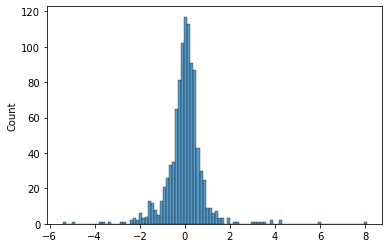

In [ ]:
import seaborn as sns
sns.histplot(fitted.resid, bins=100)

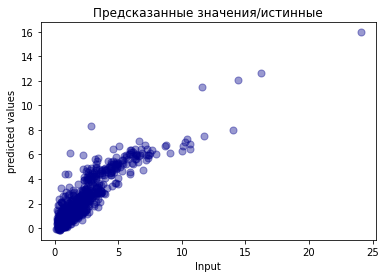

In [ ]:
plt.scatter(data.Sales, fitted.fittedvalues, color='darkblue', s=50, alpha=0.4)
plt.title('Предсказанные значения/истинные')
plt.xlabel('Input')
plt.ylabel('predicted values')
plt.show()

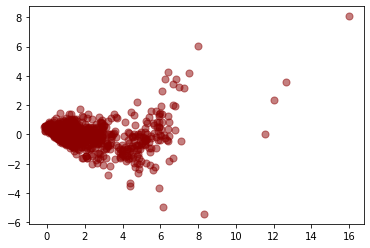

In [ ]:
plt.scatter(fitted.fittedvalues, fitted.resid, color='darkred', s=50, alpha=0.5)

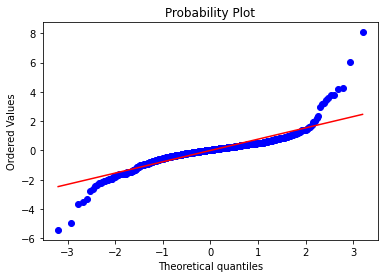

In [ ]:
sc.stats.probplot(fitted.resid, dist='norm', plot=pyplot)
plt.show()

### Избавляемся от выбросов

<AxesSubplot:xlabel='Sales'>

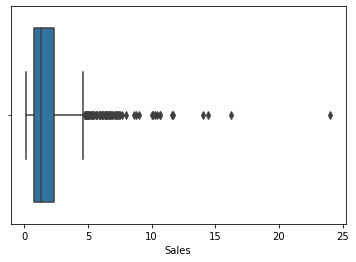

In [ ]:
sns.boxplot(data.Sales)

In [ ]:
data=data[data.Sales<5]

In [ ]:
data

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support,age,compet
0,3.59,11.67,7.82,34.1,36.90,10,1,0,1,0,6,0.80,0.48,12.86,0.000000,43.000000,0
1,1.28,2.34,4.70,27.1,16.56,1,0,0,0,0,10,0.02,0.46,2.29,0.000000,43.000000,1
2,0.48,11.73,7.07,7.9,31.32,0,0,0,0,0,5,0.06,0.38,11.79,0.000000,35.000000,837
3,0.86,9.01,3.91,19.0,16.29,3,0,0,0,0,5,0.31,0.10,8.95,0.000000,24.000000,1
4,2.24,8.93,4.20,31.2,32.40,3,1,1,0,0,8,0.07,0.36,9.94,0.897416,39.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,4.92,9.88,3.96,83.5,26.10,0,1,0,1,1,9,0.86,0.30,10.59,0.000000,26.108592,0
995,1.09,6.81,3.84,19.1,43.47,0,0,0,0,0,5,0.32,0.12,6.79,0.000000,43.000000,1
996,1.48,5.89,4.03,26.4,18.36,0,0,0,0,0,9,0.03,0.26,6.90,0.000000,36.000000,0
997,1.03,12.61,3.96,13.4,28.62,0,1,0,0,0,4,0.01,0.11,13.56,0.000000,24.000000,1


In [ ]:
m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+'\
          'lab+joint+climate+share_technology+age', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     585.5
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:00:11   Log-Likelihood:                -550.23
No. Observations:                 937   AIC:                             1118.
Df Residuals:                     928   BIC:                             1162.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3244 

<AxesSubplot:ylabel='Count'>

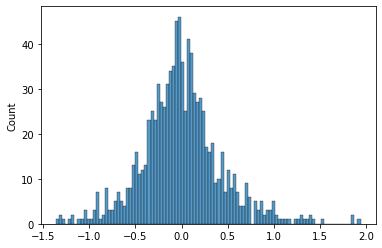

In [ ]:
import seaborn as sns
sns.histplot(fitted.resid, bins=100)

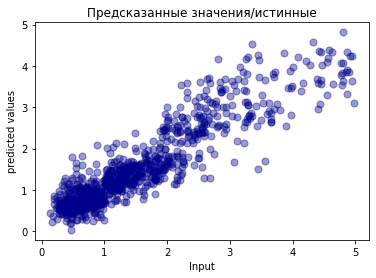

In [ ]:
plt.scatter(data.Sales, fitted.fittedvalues, color='darkblue', s=50, alpha=0.4)
plt.title('Предсказанные значения/истинные')
plt.xlabel('Input')
plt.ylabel('predicted values')
plt.show()

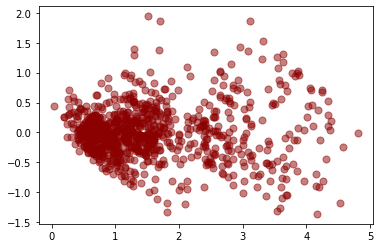

In [ ]:
plt.scatter(fitted.fittedvalues, fitted.resid, color='darkred', s=50, alpha=0.5)

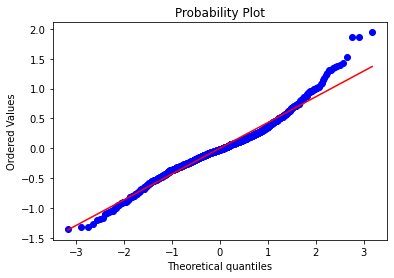

In [ ]:
sc.stats.probplot(fitted.resid, dist='norm', plot=pyplot)
plt.show()

In [ ]:
sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1]

2.648167820096688e-32

In [ ]:
sms.diagnostic.het_white(fitted.resid, fitted.model.exog)[1]

6.848898265056599e-29

In [ ]:
m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+'\
          'lab+joint+climate+share_technology+age', data=data)
fitted=m1.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     382.5
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          1.18e-287
Time:                        13:05:06   Log-Likelihood:                -550.23
No. Observations:                 937   AIC:                             1118.
Df Residuals:                     928   BIC:                             1162.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3244 

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler=MinMaxScaler()
scaler.fit(data)
data_std=scaler.transform(data)

In [ ]:
data_norm=pd.DataFrame(columns=data.columns)

In [ ]:
data_norm

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support,age,compet


In [ ]:
data_norm=pd.DataFrame(data_std)
data_norm.columns=data.columns

In [ ]:
data_norm

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support,age,compet
0,0.713402,0.410493,0.422535,0.389011,0.410861,0.526316,1.0,0.0,1.0,0.0,0.6,0.80,0.335664,0.451875,0.0,0.766667,0.000000
1,0.237113,0.079759,0.147887,0.312088,0.179303,0.052632,0.0,0.0,0.0,0.0,1.0,0.02,0.321678,0.077849,0.0,0.766667,0.001195
2,0.072165,0.412620,0.356514,0.101099,0.347336,0.000000,0.0,0.0,0.0,0.0,0.5,0.06,0.265734,0.414013,0.0,0.500000,1.000000
3,0.150515,0.316200,0.078345,0.223077,0.176230,0.157895,0.0,0.0,0.0,0.0,0.5,0.31,0.069930,0.313517,0.0,0.133333,0.001195
4,0.435052,0.313364,0.103873,0.357143,0.359631,0.157895,1.0,1.0,0.0,0.0,0.8,0.07,0.251748,0.348549,1.0,0.633333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,0.987629,0.347040,0.082746,0.931868,0.287910,0.000000,1.0,0.0,1.0,1.0,0.9,0.86,0.209790,0.371550,0.0,0.203620,0.000000
933,0.197938,0.238213,0.072183,0.224176,0.485656,0.000000,0.0,0.0,0.0,0.0,0.5,0.32,0.083916,0.237084,0.0,0.766667,0.001195
934,0.278351,0.205601,0.088908,0.304396,0.199795,0.000000,0.0,0.0,0.0,0.0,0.9,0.03,0.181818,0.240977,0.0,0.533333,0.000000
935,0.185567,0.443814,0.082746,0.161538,0.316598,0.000000,1.0,0.0,0.0,0.0,0.4,0.01,0.076923,0.476645,0.0,0.133333,0.001195


In [ ]:
m1=smf.ols('Sales ~ growth_technological+share_RD+share_equipments+'\
          'lab+joint+climate+share_technology+age', data=data_norm)
fitted=m1.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     382.5
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          1.18e-287
Time:                        13:13:45   Log-Likelihood:                 929.27
No. Observations:                 937   AIC:                            -1841.
Df Residuals:                     928   BIC:                            -1797.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0563 

In [ ]:
# логарифмируем

In [ ]:
m1=smf.ols('np.log(Sales) ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'support+lab+joint+climate+share_technology+emp+growth_innovation+fin_support+age+compet', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:18:00   Log-Likelihood:                -52.613
No. Observations:                 937   AIC:                             139.2
Df Residuals:                     920   BIC:                             221.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5562 

In [ ]:
m1=smf.ols('np.log(Sales) ~ growth_technological+growth_marketing+share_RD+share_equipments+patents+cooperation+'\
          'lab+joint+climate+share_technology+emp+fin_support+age', data=data)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     221.2
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          9.49e-273
Time:                        13:20:11   Log-Likelihood:                -347.42
No. Observations:                 937   AIC:                             722.8
Df Residuals:                     923   BIC:                             790.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.2129 

# Регуляризация

In [ ]:
X_norm=data_norm.drop('Sales', axis=1)
y_norm=data_norm.Sales

In [ ]:
from sklearn.linear_model import LassoCV
reg1=LassoCV(cv=5, random_state=18).fit(X_norm, y_norm)
reg1.coef_

array([ 0.        ,  0.        ,  0.20577817,  0.15317729,  0.00997629,
       -0.00496676, -0.        ,  0.18175903,  0.17220512,  0.0886793 ,
        0.0320235 , -0.        ,  0.17418116, -0.        ,  0.05360381,
       -0.10014105])

In [ ]:
result_reg1=pd.DataFrame(reg1.coef_)
result_reg1['features']=X_norm.columns
result_reg1

,0,features
0,0.000000,growth_technological
1,0.000000,growth_marketing
2,0.205778,share_RD
3,0.153177,share_equipments
4,0.009976,patents
5,-0.004967,cooperation
6,-0.000000,support
7,0.181759,lab
8,0.172205,joint
9,0.088679,climate


In [ ]:
reg1.score(X_norm, y_norm)

0.8591425605194138

In [ ]:
from sklearn.linear_model import RidgeCV
reg2=RidgeCV(alphas=[0.01*x for x in range(1,101)]).fit(X_norm, y_norm)

In [ ]:
reg2.alpha_

1.0

In [ ]:
result_reg2=pd.DataFrame(reg2.coef_)
result_reg2['features']=X_norm.columns
result_reg2

,0,features
0,0.069180,growth_technological
1,0.004889,growth_marketing
2,0.205168,share_RD
3,0.154901,share_equipments
4,0.016536,patents
5,-0.005933,cooperation
6,-0.015496,support
7,0.179641,lab
8,0.171723,joint
9,0.090619,climate


In [ ]:
reg2.score(X_norm, y_norm)

0.8592211333968806